1. **Andhra Pradesh [6]**  
    Anantpur, Chittoor, Guntur, Krishna, Srikakulam, Vishakapattanam

2. **Bihar [20]**  
    Araria, Begusarai, Bhagalpur, Darbhanga, EastChamparan, Gaya, Gopalganj, Jahanabad, Jamui, Kishanganj, Lakhisarai, 
    Madhepura, Muzaffarpur, Purnia, Saharsa, Samastipur, Saran, Sitamarhi, Supaul, Vaishali

3. **Chhattisgarh [10]**  
    Balrampur, Bastar, Bilaspur, Jashpur, Kabirdham, Korba, Raigarh, Rajnandgaon, Sarguja, Sukma

4. **Goa [1]**  
    NorthSouthGoa

5. **Jharkhand [2]**  
    Jamtara, Sahebganj

6. **Karnataka [10]**  
    Belgaum, Bellary, Bijapur, Chamarajanagar, DakshinaKannada, Dharwad, Gulbarga, Mysore, Raichur, Shimoga

7. **Maharashtra [7]**  
    Aurangabad, Chandrapur, Dhule, Nagpur, Pune, Sindhudurg, Solapur

8. **Rajasthan [2]**  
    Churu, Nagaur

9. **Telangana [2]**  
    Karimnagar, Nalgonda

10. **Uttar Pradesh [10]**  
    Budaun, Deoria, Etah, Ghazipur, Gorakhpur, Hamirpur, Jalaun, JyotibaPhuleNagar, Muzaffarnagar, Varanasi

11. **Uttarakhand [2]**  
    TehriGarhwal, Uttarkashi

12. **West Bengal [8]**  
    DakshinDinajpur, Jalpaiguri, Jhargram, Kolkata, Malda, North24Parganas, PaschimMedinipur, Purulia

In [1]:
# !pip install huggingface_hub
# !pip install datasets

import os
import subprocess
import numpy as np
from scipy.io.wavfile import write # type: ignore
from tqdm import tqdm, trange
from collections import Counter
import datasets
from datasets import Audio
from datasets import load_dataset
from datasets import get_dataset_config_names

HF_TOKEN = open("/home/IITB/ai-at-ieor/23m1521/.cache/huggingface/token", "r").read().strip()

In [2]:
def array_to_wav(audio_array: np.ndarray, sample_rate: int, file_name: str):
    # Normalize if outside [-1, 1] to prevent clipping
    # if np.max(np.abs(audio_array)) > 1.0:
    #     audio_array = audio_array / np.max(np.abs(audio_array))
    # Convert to 16-bit PCM
    # audio_int16 = np.int16(audio_array * 32767)
    # Write to WAV file
    # write(file_name, sample_rate, audio_int16)
    write(file_name, sample_rate, audio_array)

In [3]:
configs = get_dataset_config_names("ARTPARK-IISc/Vaani")
configs

README.md:   0%|          | 0.00/158k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/57 [00:00<?, ?it/s]

['AndhraPradesh_Anantpur',
 'AndhraPradesh_Chittoor',
 'AndhraPradesh_Guntur',
 'AndhraPradesh_Krishna',
 'AndhraPradesh_Srikakulam',
 'AndhraPradesh_Vishakapattanam',
 'ArunachalPradesh_Longding',
 'ArunachalPradesh_PapumPare',
 'Assam_KamrupMetropolitan',
 'Assam_Sonitpur',
 'Bihar_Araria',
 'Bihar_Begusarai',
 'Bihar_Bhagalpur',
 'Bihar_Darbhanga',
 'Bihar_EastChamparan',
 'Bihar_Gaya',
 'Bihar_Gopalganj',
 'Bihar_Jahanabad',
 'Bihar_Jamui',
 'Bihar_Kaimur',
 'Bihar_Katihar',
 'Bihar_Kishanganj',
 'Bihar_Lakhisarai',
 'Bihar_Madhepura',
 'Bihar_Muzaffarpur',
 'Bihar_Patna',
 'Bihar_Purnia',
 'Bihar_Saharsa',
 'Bihar_Samastipur',
 'Bihar_Saran',
 'Bihar_Sitamarhi',
 'Bihar_Supaul',
 'Bihar_Vaishali',
 'Bihar_WestChamparan',
 'Chandigarh_Chandigarh',
 'Chhattisgarh_Balrampur',
 'Chhattisgarh_Bastar',
 'Chhattisgarh_Bilaspur',
 'Chhattisgarh_Jashpur',
 'Chhattisgarh_Kabirdham',
 'Chhattisgarh_Korba',
 'Chhattisgarh_Raigarh',
 'Chhattisgarh_Rajnandgaon',
 'Chhattisgarh_Sarguja',
 'Chhat

In [7]:
cache_dir = "/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Audio-Cache"
district = "Delhi_NewDelhi"

ds = load_dataset("ARTPARK-IISc/Vaani", district, num_proc=20, split="train",
                  token=HF_TOKEN, cache_dir=cache_dir, streaming=False)

Resolving data files:   0%|          | 0/57 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/54 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/164125 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/54 [00:00<?, ?it/s]

In [12]:
ds[1]

{'audio': {'path': 'IISc_VaaniProject_M_Delhi_NewDelhi_Kaja46663_46663042818000098744_GENERIC_1011_9567_12451.wav',
  'array': array([-0.00231934, -0.00839233,  0.0072937 , ...,  0.00436401,
          0.00564575,  0.00854492], shape=(46150,)),
  'sampling_rate': 16000},
 'language': 'Hindi',
 'languagesKnown': "['Hindi']",
 'gender': 'Female',
 'state': 'Delhi',
 'district': 'NewDelhi',
 'pincode': 110001,
 'stay(years)': 'NewDelhi(19)',
 'isTranscriptionAvailable': 'No',
 'transcript': None,
 'referenceImage': 'Images/IISc_VaaniProject_GENERIC_1011.jpg'}

In [ ]:
ds_images = load_dataset("ARTPARK-IISc/Vaani", "images", num_proc=20, split="train",
                  token=HF_TOKEN, streaming=False)

README.md:   0%|          | 0.00/158k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/57 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/114 [00:00<?, ?it/s]

In [6]:
import os
# import pandas as pd
import fireducks.pandas as pd
from tqdm import tqdm, trange

In [2]:
os.listdir("/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Audios/Parquet")

['Audio_NewDelhi_train-00000-of-00054.parquet',
 'Image_train-00000-of-00114.parquet']

In [4]:
audio_shard = pd.read_parquet("/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Audios/Parquet/Audio_NewDelhi_train-00000-of-00054.parquet")
audio_shard

audio 
 language 
 languagesKnown 
 gender 
 state 
 district 
 pincode 
 stay(years) 
 isTranscriptionAvailable 
 transcript 
 referenceImage 
 
 
 
 
 0 
 {'bytes': b'RIFF\xd2\x04\x01\x00WAVEfmt \x10\x... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110004 
 NewDelhi(20) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_0473.jpg 
 
 
 1 
 {'bytes': b'RIFF\xb0h\x01\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110001 
 NewDelhi(19) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_1011.jpg 
 
 
 2 
 {'bytes': b'RIFF\x84+\x01\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110067 
 NewDelhi(11) 
 No 
 None 
 Images/IISc_VaaniProject_NewDelhi-SPECIFIC_015... 
 
 
 3 
 {'bytes': b'RIFF2\xd3\x01\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Male 
 Delhi 
 NewDelhi 
 110001 
 NewDelhi(24) 
 Yes 
 ऐच_डी_ऐफ_सी बैंक {H_D_F_C bank} का और उसमे एक ... 
 Images/IISc_VaaniProject_GENERIC_0418.jpg 
 
 
 4 
 {'bytes': b'RIFF\xe45\x01\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Male 
 Delhi 
 NewDelhi 
 110023 
 NewDelhi(20) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_0851.jpg 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 3035 
 {'bytes': b'RIFF\xbch\x02\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110038 
 NewDelhi(20) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_0193.jpg 
 
 
 3036 
 {'bytes': b'RIFFJD\x01\x00WAVEfmt \x10\x00\x00... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110028 
 NewDelhi(20) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_0249.jpg 
 
 
 3037 
 {'bytes': b'RIFF\x12\x02\x01\x00WAVEfmt \x10\x... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110023 
 NewDelhi(20) 
 No 
 None 
 Images/IISc_VaaniProject_GENERIC_1268.jpg 
 
 
 3038 
 {'bytes': b'RIFFz\xbc\x01\x00WAVEfmt \x10\x00\... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110011 
 NewDelhi(23) 
 No 
 None 
 Images/IISc_VaaniProject_NewDelhi-SPECIFIC_016... 
 
 
 3039 
 {'bytes': b'RIFF\xc8\xa4\x01\x00WAVEfmt \x10\x... 
 Hindi 
 ['Hindi'] 
 Female 
 Delhi 
 NewDelhi 
 110011 
 NewDelhi(23) 
 No 
 None 
 Images/IISc_VaaniProject_NewDelhi-SPECIFIC_012... 
 
 
 
 3040 rows x 11 columns

In [7]:
image_shard = pd.read_parquet(
    "/scratch/IITB/ai-at-ieor/23m1521/hf_cache/hub/datasets--ARTPARK-IISc--VAANI/blobs/1380dea3251950ec13395bdcef2e358df2a0a8a81ef02cc83e7e99a029569628"
    )
image_shard

image 
 
 
 
 
 0 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 1 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 3 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 4 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 ... 
 ... 
 
 
 2536 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2537 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2538 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2539 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2540 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 
 2541 rows x 1 columns

In [8]:
image_shard.image[0]

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x04\xb0\x03\x84\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xc

In [9]:
img = image_shard.image[0]['bytes']
path = image_shard.image[0]['path']

In [11]:
path

'IISc_VaaniProject_Budaun-SPECIFIC_02035.jpg'

In [4]:
import os
basedir = "/scratch/IITB/ai-at-ieor/23m1521/hf_cache/hub/datasets--ARTPARK-IISc--VAANI/blobs"
image_shards = [os.path.join(basedir, f) for f in os.listdir(basedir)]

In [2]:
image_shard = pd.read_parquet("/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Audios/Parquet/Image_train-00000-of-00114.parquet")
image_shard

image 
 
 
 
 
 0 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 1 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 3 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 4 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 ... 
 ... 
 
 
 2537 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2538 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2539 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2540 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 2541 
 {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x... 
 
 
 
 2542 rows x 1 columns

In [3]:
image_shard.image[0]

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x04\xb0\x03\x84\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xc

In [30]:
from PIL import Image
import io

jpeg_bytes = image_shard.image[0]['bytes']

# Load the image from bytes
image = Image.open(io.BytesIO(jpeg_bytes))

# Display (if using notebook)
# image.show()

# Or save it
# image.save('output.jpg')

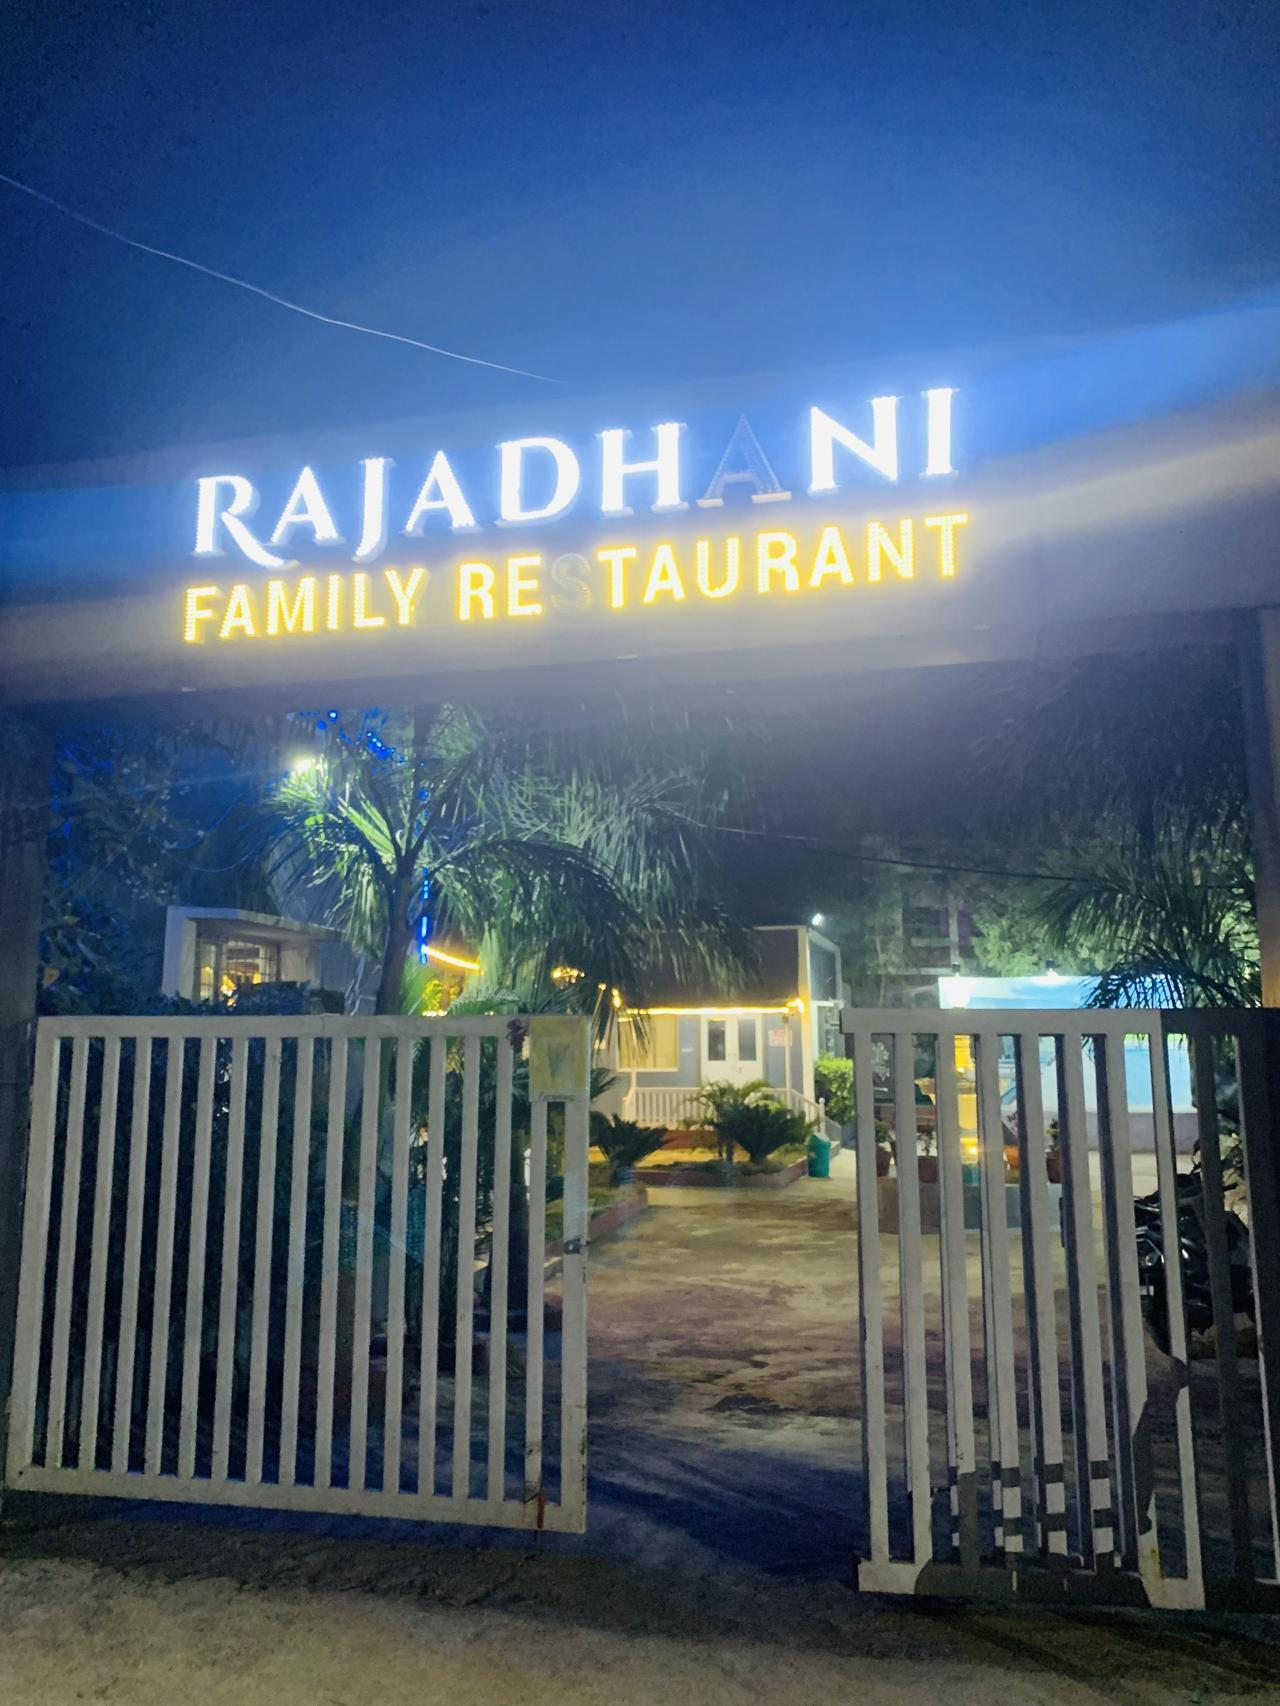

In [28]:
image

In [ ]:
image_shard.image[0]['bytes']

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x06\xaa\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [1]:
import fireducks.pandas as pd
import os

len(os.listdir("/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Images/From-Images-Config/"))

5916

In [2]:
basedir = "/scratch/IITB/ai-at-ieor/23m1521/hf_cache/hub/vaani_image_blobs/blobs"
image_shards = [os.path.join(basedir, f) for f in os.listdir(basedir)]
len(image_shards)

113